In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stars_df = pd.read_csv("C:\Datasets\planets_and_stars\cleaned.csv")
planet_df = pd.read_csv("C:\Datasets\planets_and_stars\oec.csv")
planet_raw_df =  pd.read_csv("C:\Datasets\planets_and_stars\oec_1.csv")

In [3]:
stars_df['Mass'] = stars_df['Mass'].fillna('0')

In [4]:
planet_df.dropna()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,DiscoveryYear,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr


In [5]:
planet_df.shape

(3426, 24)

In [6]:
planet_raw_df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
AgeGyr                  3582
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

In [7]:
planet_raw_df.dropna()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn


In [8]:
planet_raw_df.isnull().sum()

PlanetIdentifier           0
TypeFlag                   0
PlanetaryMassJpt        2271
RadiusJpt                810
PeriodDays                99
SemiMajorAxisAU         2178
Eccentricity            2476
PeriastronDeg           3256
LongitudeDeg            3541
AscendingNodeDeg        3538
InclinationDeg          2919
SurfaceTempK            2843
AgeGyr                  3582
DiscoveryMethod           63
DiscoveryYear             10
LastUpdated                8
RightAscension            10
Declination               10
DistFromSunParsec       1451
HostStarMassSlrMass      168
HostStarRadiusSlrRad     321
HostStarMetallicity     1075
HostStarTempK            129
HostStarAgeGyr          3067
ListsPlanetIsOn            0
dtype: int64

In [9]:
planet_raw_df.shape

(3584, 25)

# Astro Analysis 

In [10]:
stars_df.columns

Index(['Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius', 'Luminosity'], dtype='object')

In [11]:
stars_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
for column in stars_df.columns:
    print (column)
    print (stars_df[column].nunique())

Star_name
254
Distance
247
Mass
190
Radius
164
Luminosity
147


In [13]:
stars_df.Star_name.value_counts().head(10)
# there are all unique entries

Sun    1
101    1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
Name: Star_name, dtype: int64

In [14]:
# Correlation ,does distance depend on mass and viceversa?
star_corr = stars_df.corr()

In [15]:
stars_df = stars_df.sort_values(by ='Luminosity',ascending=True)

In [16]:
stars_df.head(10)

,Star_name,Distance,Mass,Radius,Luminosity
93,2MASS J0523-1403,040.3,0.07,0.086,0.00013
90,VB 10,018.72,0.075,0.10,0.0004
92,TRAPPIST-1,039.6,0.089,0.12,0.0005
81,Proxima Centauri,04.25,0.12,0.15,0.0017
88,Gliese 1214,047.5,0.16,0.21,0.0033
79,Barnard's Star,05.98,0.14,0.20,0.0035
71,Lacaille 8760,012.87,0.6,0.51,0.072
253,284,WISE 1405+5534,25.3,0.028637640000000002,0.08837618
209,143,2MASS 1503+2525,20.7,0.042001872,0.09659721999999998
243,181,2MASS J22282889-4310262,35.0,0.040092696000000004,0.09659721999999998


In [17]:
stars = np.where(stars_df['Luminosity']==1)

In [18]:
stars_df.tail(10)

,Star_name,Distance,Mass,Radius,Luminosity
36,Wezen,"1,600",17,200,"82,000"
25,Gacrux,0088,1.5,84,820
95,Icarus,"014,400,000,000",33,?,"850,000"
78,UY Scuti,"05,100",7â€“10,755,"86,300 - 87,100"
69,Mira,0300,1.2,370,"9,000"
26,Bellatrix,0240,8.6,5.8,"9,200"
45,Alsephina[2],0080,2.4,2.9,90
77,S Doradus,"0169,000",24,380,"910,000"
80,Luhman 16,06.52,0.04,?,?
94,WISE 0855âˆ’0714,07.27,0.003,?,?


In [19]:
# Analyse the 10 closest stars to Earth
type(stars_df['Distance'].values)

numpy.ndarray

# Planets 

In [20]:
planet_raw_df.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

In [21]:
# Lets explore how many confirmed planets are there
#len(planet_raw_df['ListsPlanetIsOn'])
planet_raw_df['ListsPlanetIsOn'].value_counts().head(20)
"""There are a total of 3584 planets of which  3486 are confirmed planets and 98 are controversial"""

'There are a total of 3584 planets of which  3486 are confirmed planets and 98 are controversial'

In [22]:
len(planet_raw_df['ListsPlanetIsOn']) - 98

3486

# Confirmed planets 

In [23]:
# Confirmed planets 
planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets']['PeriodDays'].mean()


290.7689358170256

In [24]:
def planets_checking_criterion(column,identifier,perioddays,discoveryyear,df=stars_df):
    print(f"The average rotating time for planets in|{column } is {planet_raw_df[planet_raw_df[column]==identifier][perioddays].mean()}")
    print('==================================================================================================================')
    print(f"The year of discovery for all |{identifier } is {planet_raw_df[planet_raw_df[column]==identifier][discoveryyear].value_counts().head(10)}")

In [25]:
planets_checking_criterion('ListsPlanetIsOn','Confirmed planets','PeriodDays','DiscoveryYear')
# Most confirmed planets were discovered in 2016 and one was discovered in 1995

The average rotating time for planets in|ListsPlanetIsOn is 290.7689358170256
The year of discovery for all |Confirmed planets is 2016.0    1408
2014.0     885
2011.0     168
2015.0     158
2013.0     114
2010.0     103
2012.0      97
2009.0      72
2008.0      57
2007.0      52
Name: DiscoveryYear, dtype: int64


# Confirmed planets in binary systems -S type

In [26]:
planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets, Planets in binary systems, S-type']['PeriodDays'].mean()


2217.422477106732

In [27]:
planets_checking_criterion('ListsPlanetIsOn','Confirmed planets, Planets in binary systems, S-type','PeriodDays','DiscoveryYear')
#Most of them were discovered in 2015,the average rotating time is 2217 days 

The average rotating time for planets in|ListsPlanetIsOn is 2217.422477106732
The year of discovery for all |Confirmed planets, Planets in binary systems, S-type is 2015.0    19
2014.0    14
2011.0    11
2010.0     9
2000.0     8
2005.0     7
2012.0     7
2002.0     6
2008.0     6
2004.0     5
Name: DiscoveryYear, dtype: int64


# Controversial planets

In [28]:
# CONTROVERSIAL PLANETS
planets_checking_criterion('ListsPlanetIsOn','Controversial','PeriodDays','DiscoveryYear')
#641 days thats really sus

The average rotating time for planets in|ListsPlanetIsOn is 641.4867403621872
The year of discovery for all |Controversial is 2014.0    16
2012.0    14
2013.0    11
2015.0    10
2010.0     3
2007.0     3
2017.0     2
2009.0     2
2011.0     2
2003.0     1
Name: DiscoveryYear, dtype: int64


# Analysis of Host Stars ,Generally,By Confirmed planets,By Controversial planets

In [29]:
planet_raw_df.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

Text(0.5, 1.0, 'How Hosts star  Radius  is distributed')

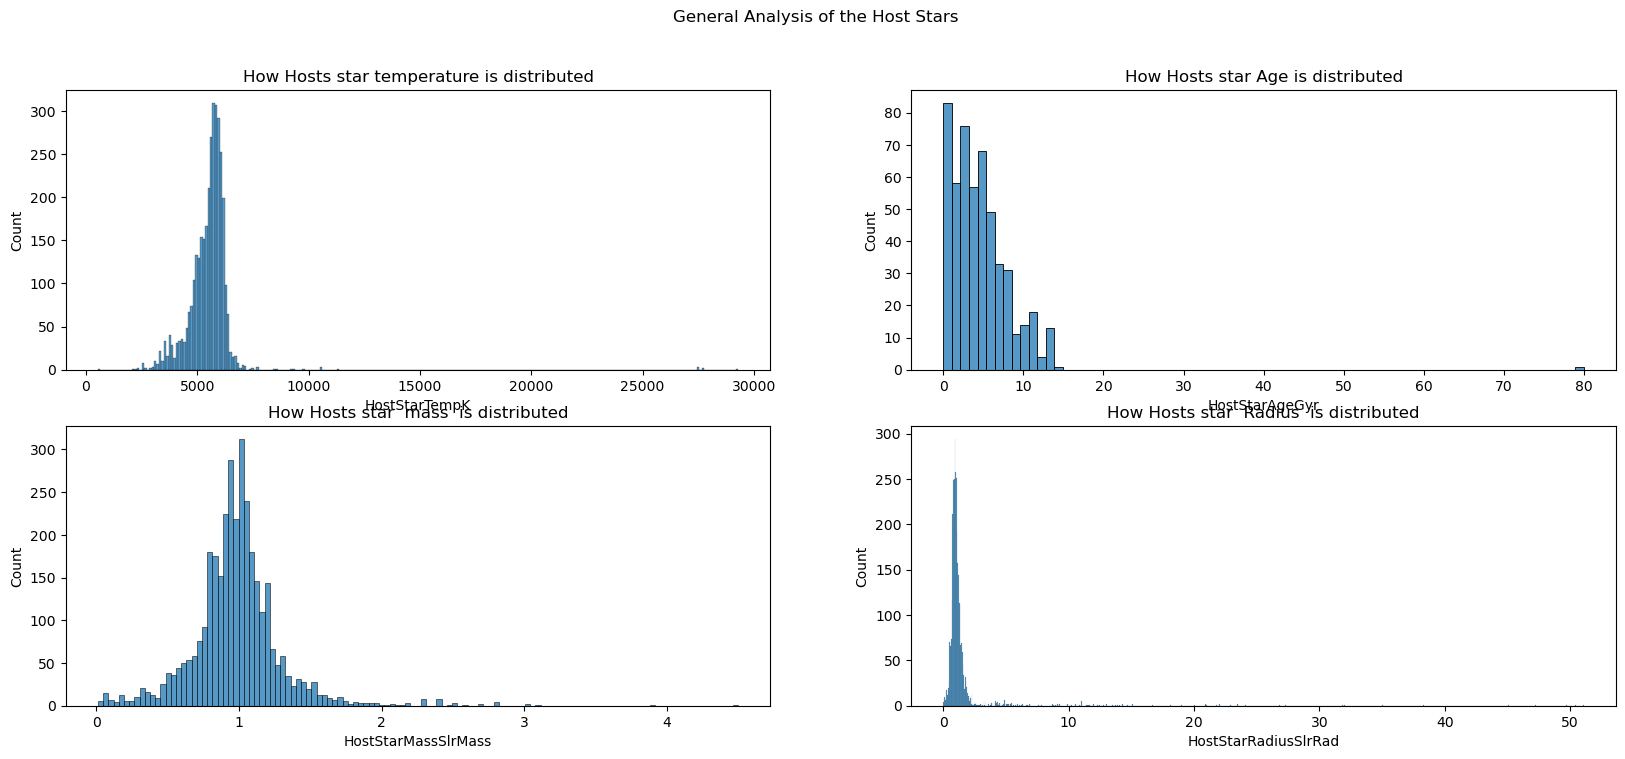

In [30]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('General Analysis of the Host Stars')
plt.subplot(2,2,1)
sns.histplot(x= planet_raw_df['HostStarTempK'])
plt.title('How Hosts star temperature is distributed')
plt.subplot(2,2,2)
sns.histplot(x= planet_raw_df['HostStarAgeGyr'])
plt.title('How Hosts star Age is distributed')
plt.subplot(2,2,3)
sns.histplot(x= planet_raw_df['HostStarMassSlrMass'])
plt.title('How Hosts star  mass  is distributed')
plt.subplot(2,2,4)
sns.histplot(x= planet_raw_df['HostStarRadiusSlrRad'])
plt.title('How Hosts star  Radius  is distributed')
# Most host stars have a temp of 7000k, 1 year,mass of 1 and radius of 3 or 4

Text(0.5, 1.0, 'How Hosts star  Radius  is distributed')

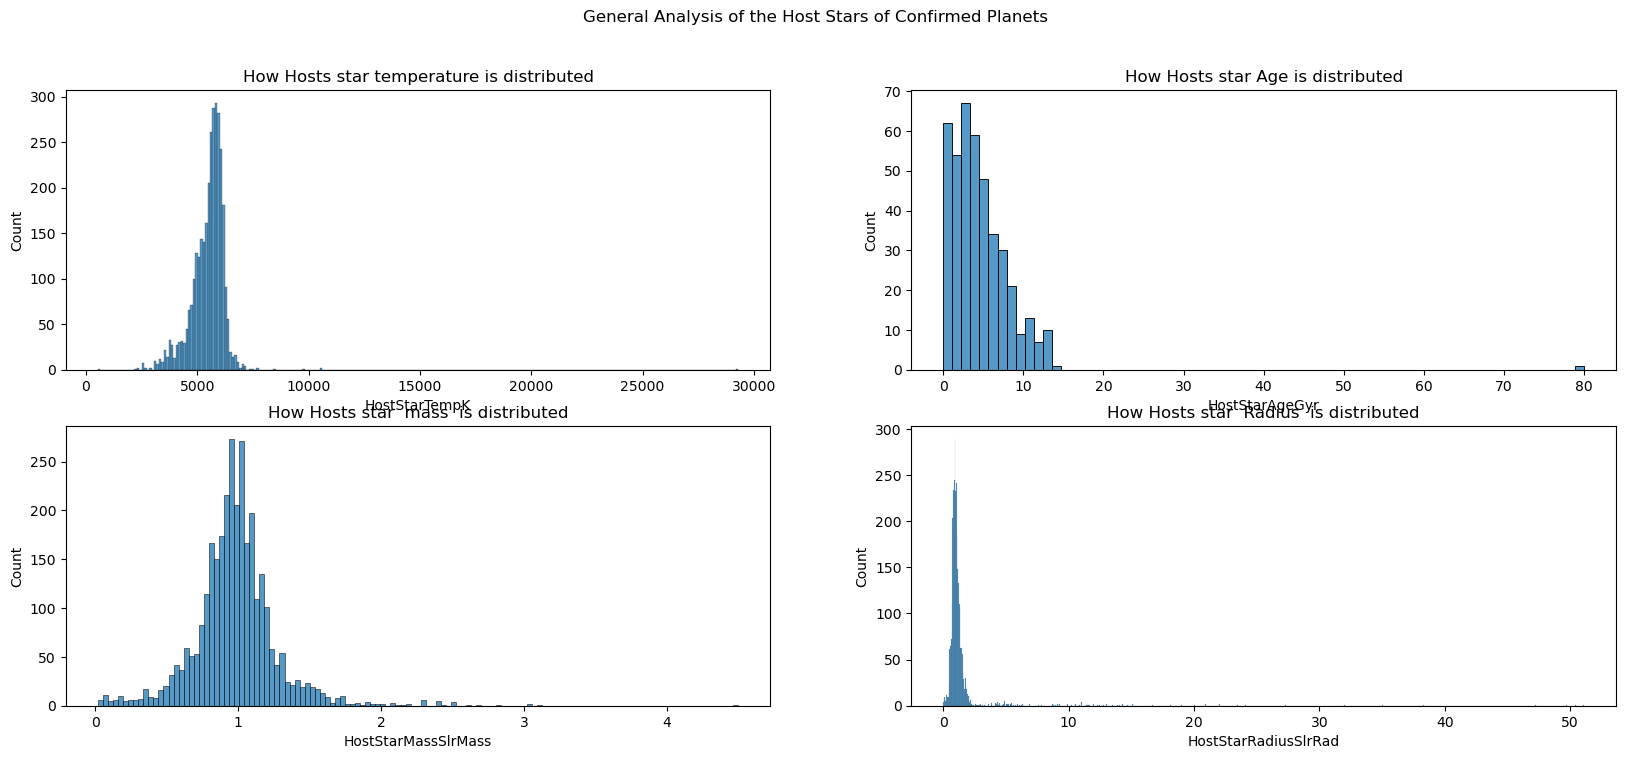

In [31]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('General Analysis of the Host Stars of Confirmed Planets')
plt.subplot(2,2,1)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets']['HostStarTempK'])
plt.title('How Hosts star temperature is distributed')
plt.subplot(2,2,2)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets']['HostStarAgeGyr'])
plt.title('How Hosts star Age is distributed')
plt.subplot(2,2,3)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets']['HostStarMassSlrMass'])
plt.title('How Hosts star  mass  is distributed')
plt.subplot(2,2,4)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets']['HostStarRadiusSlrRad'])
plt.title('How Hosts star  Radius  is distributed')

In [32]:
Confirmed planets, Planets in binary systems, S-type

SyntaxError: invalid syntax (3435960979.py, line 1)

Text(0.5, 1.0, 'How Hosts star  Radius  is distributed')

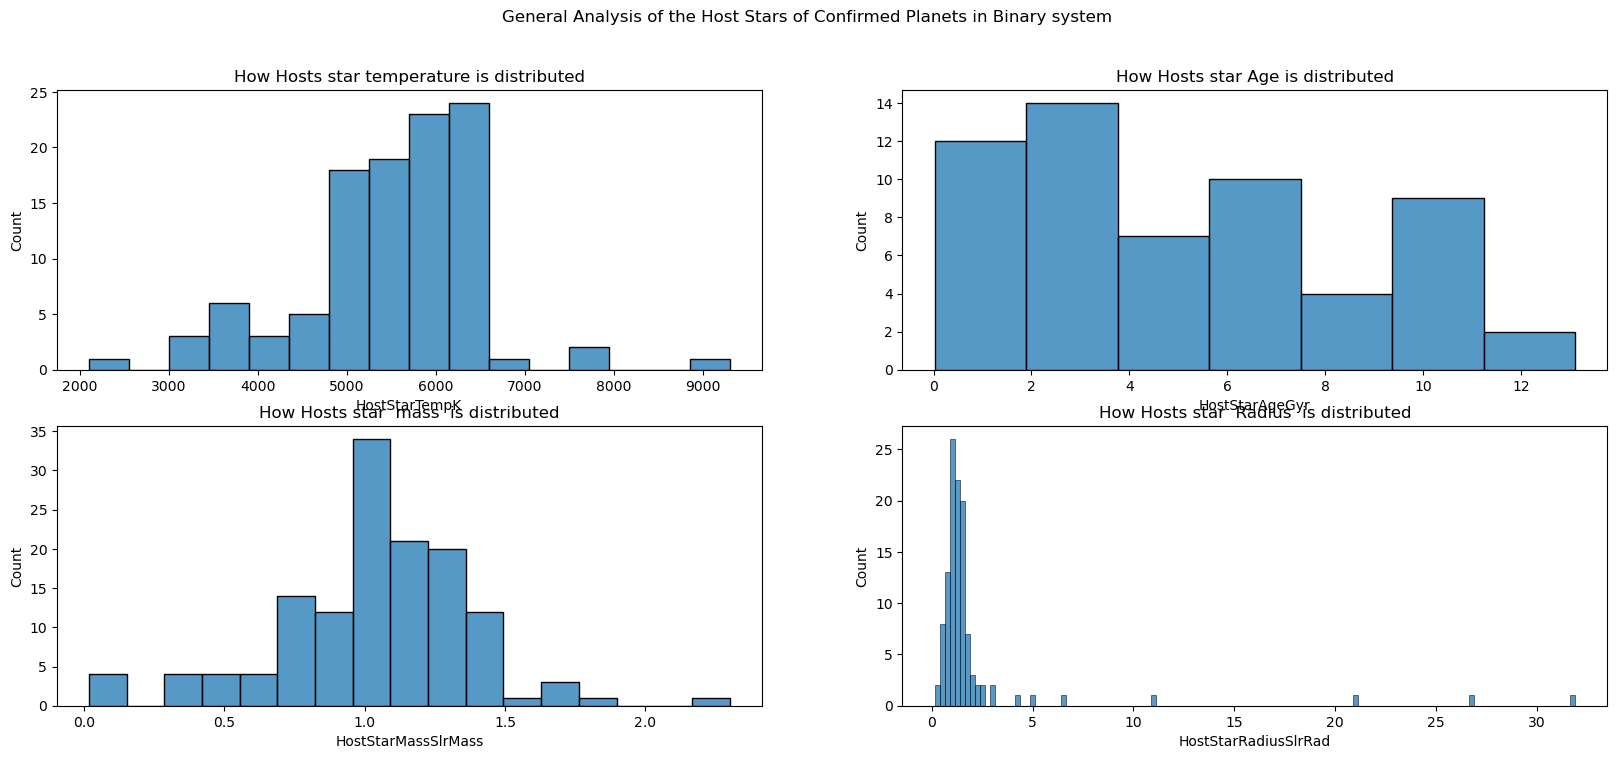

In [33]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('General Analysis of the Host Stars of Confirmed Planets in Binary system')
plt.subplot(2,2,1)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets, Planets in binary systems, S-type']['HostStarTempK'])
plt.title('How Hosts star temperature is distributed')
plt.subplot(2,2,2)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets, Planets in binary systems, S-type']['HostStarAgeGyr'])
plt.title('How Hosts star Age is distributed')
plt.subplot(2,2,3)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets, Planets in binary systems, S-type']['HostStarMassSlrMass'])
plt.title('How Hosts star  mass  is distributed')
plt.subplot(2,2,4)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Confirmed planets, Planets in binary systems, S-type']['HostStarRadiusSlrRad'])
plt.title('How Hosts star  Radius  is distributed')

In [ ]:
#Controversial planets

Text(0.5, 1.0, 'How Hosts star  Radius  is distributed')

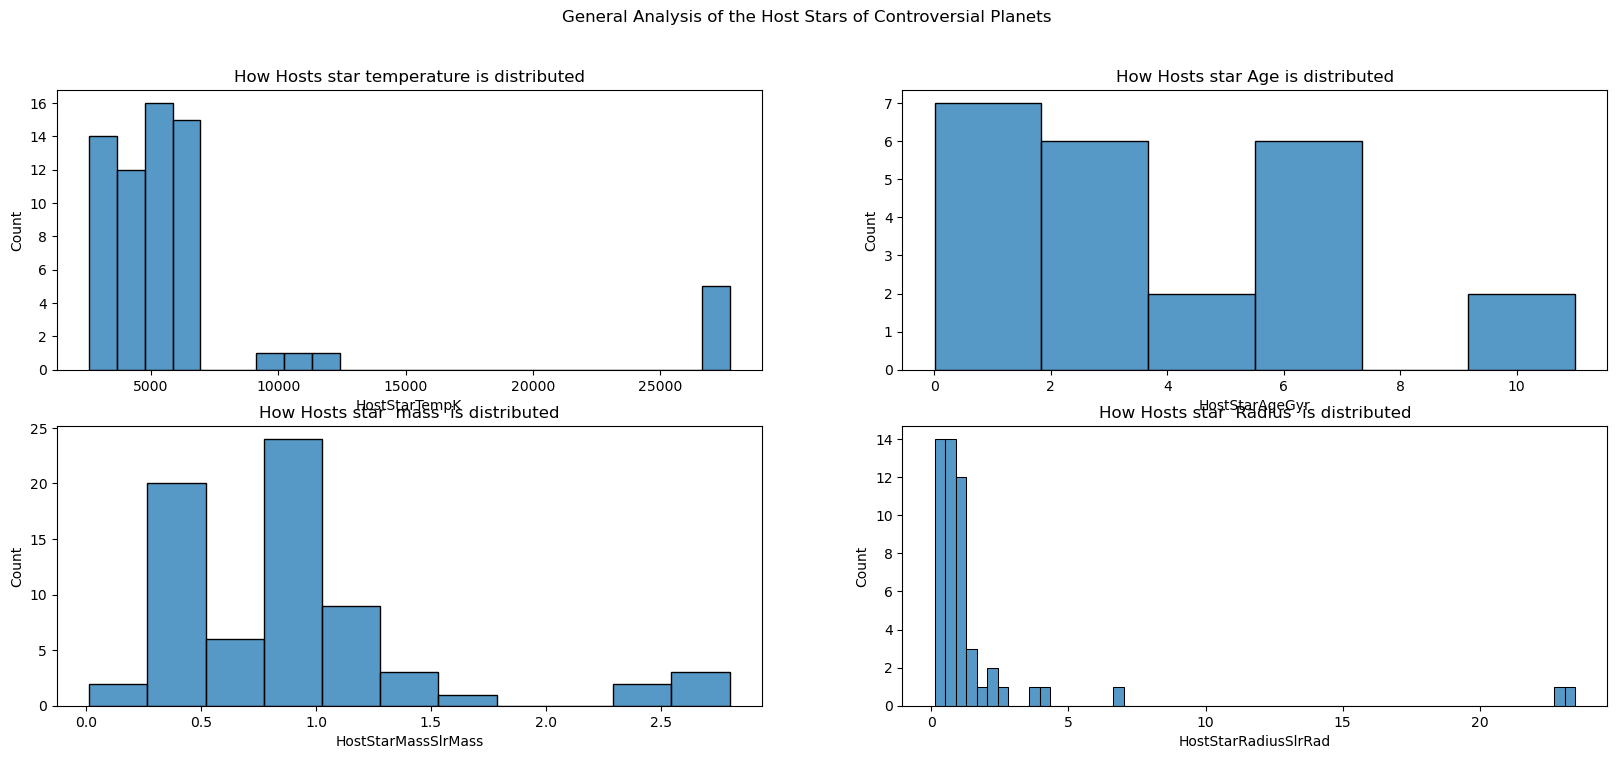

In [34]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('General Analysis of the Host Stars of Controversial Planets')
plt.subplot(2,2,1)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Controversial']['HostStarTempK'])
plt.title('How Hosts star temperature is distributed')
plt.subplot(2,2,2)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Controversial']['HostStarAgeGyr'])
plt.title('How Hosts star Age is distributed')
plt.subplot(2,2,3)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Controversial']['HostStarMassSlrMass'])
plt.title('How Hosts star  mass  is distributed')
plt.subplot(2,2,4)
sns.histplot(x= planet_raw_df[planet_raw_df['ListsPlanetIsOn']=='Controversial']['HostStarRadiusSlrRad'])
plt.title('How Hosts star  Radius  is distributed')

In [36]:
planet_raw_df.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [65]:
# Sample out earth like planets
earth_mass =planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['PlanetaryMassJpt']
earth_radius = planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['RadiusJpt']

In [57]:
planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['RadiusJpt']

410    0.09113
Name: RadiusJpt, dtype: float64

In [58]:
planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['Eccentricity']

410    0.016732
Name: Eccentricity, dtype: float64

In [64]:
sun_mass = planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['HostStarMassSlrMass']
sun_radius =planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['HostStarRadiusSlrRad']

In [63]:
life_insight = earth_mass/sun_mass *100
life_ration

410    0.31457
dtype: float64

In [68]:
life_insight_2 = (earth_radius/sun_radius) * 100
life_insight_2

410    9.113029
dtype: float64

In [69]:
planet_raw_df['life_insight'] = (planet_raw_df['PlanetaryMassJpt']/planet_raw_df['HostStarMassSlrMass'])*100
planet_raw_df['life_insight_2'] = (planet_raw_df['RadiusJpt']/planet_raw_df['HostStarMassSlrMass'])*100

In [70]:
sorted_df = planet_raw_df[['PlanetIdentifier','life_insight','life_insight_2']]
# Life ration should be close to 0.3,life_insight_2 :9.11

In [72]:
sorted_df.dropna()

,PlanetIdentifier,life_insight,life_insight_2
2,KOI-1843.03,0.304348,11.739130
5,Kepler-9 b,23.364486,78.504673
6,Kepler-9 c,15.887850,76.635514
7,Kepler-9 d,2.056075,13.738318
10,WASP-124 b,56.074766,115.887850
...,...,...,...
3557,CoRoT-8 b,25.000000,64.772727
3572,WASP-122 b,98.000000,140.857143
3574,HAT-P-21 b,429.039071,108.130940
3576,HAT-P-67 b,20.706456,126.979294


In [94]:
sorted_df.sort_values(by='life_insight').head(50)

,PlanetIdentifier,life_insight,life_insight_2
416,Pluto,0.000776,1.643790
3323,PSR 1257+12 A,0.004493,NaN
408,Mercury,0.017387,3.490152
411,Mars,0.033800,4.848908
1128,Kepler-138 b,0.039923,9.130518
2081,Gliese 436 c,0.194866,13.306635
2799,Kepler-33 c,0.195198,22.587142
409,Venus,0.256374,8.656491
2780,KOI-55 b,0.282258,13.709677
2,KOI-1843.03,0.304348,11.739130


In [79]:
planet_raw_df[planet_raw_df['PlanetIdentifier']=='Earth']['life_insight']

410    0.31457
Name: life_insight, dtype: float64

In [81]:
sorted_df.head(20)

,PlanetIdentifier,life_insight,life_insight_2
0,HD 143761 b,117.547807,NaN
1,HD 143761 c,8.886389,NaN
2,KOI-1843.03,0.304348,11.739130
3,KOI-1843.01,NaN,24.782609
4,KOI-1843.02,NaN,15.434783
5,Kepler-9 b,23.364486,78.504673
6,Kepler-9 c,15.887850,76.635514
7,Kepler-9 d,2.056075,13.738318
8,GJ 160.2 b,4.652174,NaN
9,Kepler-566 b,NaN,23.132530


In [87]:
# 0.3 LIFE RATION AND A 9.89 LIFE INSIGHT INDICATES A POSSIBLE HABITABLE PLANET
earth_like  = sorted_df.sort_values(by='life_insight').head(30)
# I will choose those planets that have close resemblance to earths life ration using the two new columns

,PlanetIdentifier,life_insight,life_insight_2
416,Pluto,0.000776,1.643790
3323,PSR 1257+12 A,0.004493,NaN
408,Mercury,0.017387,3.490152
411,Mars,0.033800,4.848908
1128,Kepler-138 b,0.039923,9.130518
2081,Gliese 436 c,0.194866,13.306635
2799,Kepler-33 c,0.195198,22.587142
409,Venus,0.256374,8.656491
2780,KOI-55 b,0.282258,13.709677
2,KOI-1843.03,0.304348,11.739130


In [ ]:
# Aside from Earth ,Kepler -128 b ,Kepler 59-b are some of possible habitable planets

# Finir ,Thank You